In [2]:
!pip install tensorflow


     -------------------------------------- 300.9/300.9 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 628.4 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.3 MB/s eta 0:00:00
     ------------------------------------ 413.4/413.4 kB 629.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 42

In [6]:
!pip install utils

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

# Import the dataset

In [8]:
df = pd.read_csv('house_data.csv') 
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [11]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [12]:
df.shape

(5000, 7)

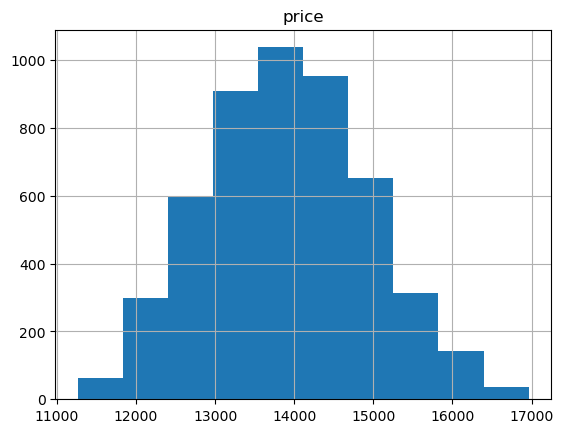

In [13]:
df.hist("price")
plt.show()

# CHECK FOR MISSING VALUES IN THE DATASET

In [14]:
df.isnull().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# DATA NORMALIZATION

In [15]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


# SELECT X LABELS

In [16]:
X = df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


# SELECT Y LABELS

In [17]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

# FEATURE AND LABEL VALUES

In [18]:
X_arr = X.values
Y_arr = Y.values

In [19]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [20]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

# TRAIN AND TEST SPLIT

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


# CREATE THE MODEL

In [22]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [23]:
model = get_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [24]:
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 21ms/step


In [25]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000

155/155 [==============================] - 2s 6ms/step - loss: 1.1662 - val_loss: 0.8043
Epoch 2/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.1639 - val_loss: 0.8027
Epoch 3/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1617 - val_loss: 0.8010
Epoch 4/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1595 - val_loss: 0.7993
Epoch 5/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1573 - val_loss: 0.7978
Epoch 6/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1551 - val_loss: 0.7962
Epoch 7/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1529 - val_loss: 0.7947
Epoch 8/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1507 - val_loss: 0.7931
Epoch 9/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1486 - val_loss: 0.7916
Epoch 10/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.14

# Plot training and validation loss

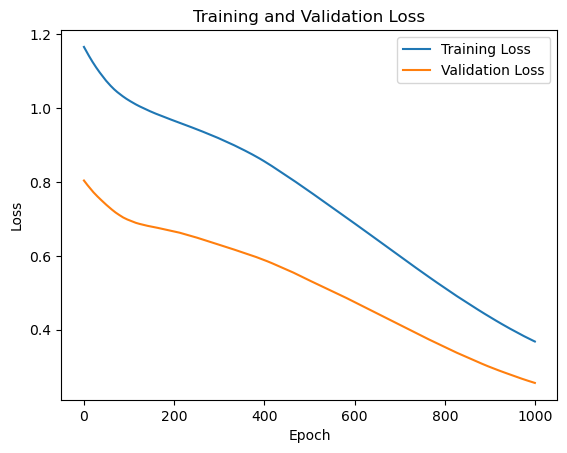

In [27]:

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')

   
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    
    plt.show()


plot_loss(history)


# Predictions

In [28]:
preds_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


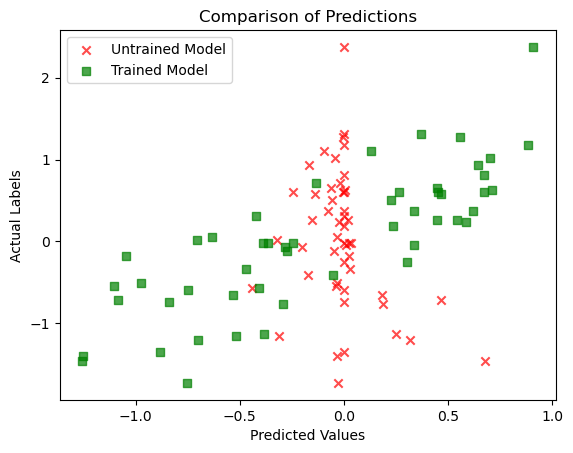

In [31]:

import matplotlib.pyplot as plt
import numpy as np

def compare_predictions(preds_on_untrained, preds_on_trained, y_test):
    # Plotting predictions on untrained model
    plt.scatter(preds_on_untrained, y_test, label='Untrained Model', marker='x', color='red', alpha=0.7)

    # Plotting predictions on trained model
    plt.scatter(preds_on_trained, y_test, label='Trained Model', marker='s', color='green', alpha=0.7)

    plt.title('Comparison of Predictions')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Labels')
    plt.legend()
    plt.show()


compare_predictions(preds_on_untrained, preds_on_trained, y_test)


# Convert label value

In [32]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_actual(pred):
    return int(pred * y_std + y_mean)

print(convert_label_actual(-1.836486))

12031


# Price predictions

In [33]:
price_on_untrained = [convert_label_actual(y) for y in preds_on_untrained]
price_on_trained = [convert_label_actual(y) for y in preds_on_trained]
price_y_test = [convert_label_actual(y) for y in y_test]

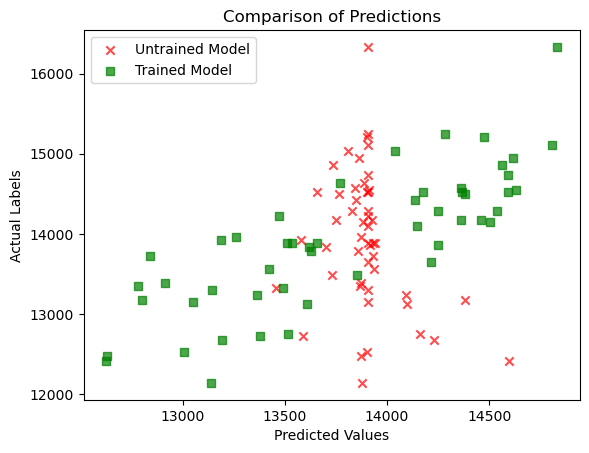

In [34]:
compare_predictions(price_on_untrained, price_on_trained, price_y_test)